In [1]:

import numpy as np
import matplotlib.pyplot as plt


### Q2

In [2]:
np.random.seed(5)
blob_count = 3
blob_dim = 2
mean = np.array([[0,0],[1.5,1.5],[1.5,0]])
pi = np.array([0.3333,0.3333,0.3333])
covariance = np.array([[[0.05,0],[0,0.5]],[[0.5,0],[0,0.05]],[[0.5,0.5],[0,0.05]]])

pi.shape

(3,)

In [3]:
dataset = []
label = []
N = 1000
for sample in range(N):
    r = np.random.rand()
    bin = 0
    blob = 0
    for prob in pi:
        bin += prob
        if(r > bin):
            blob += 1
    dataset.append(np.random.multivariate_normal(mean[blob], covariance[blob]))
    label.append(blob)
dataset = np.array(dataset)
label = np.array(label)
dataset.shape, label.shape


C:\Users\Prakhar\AppData\Local\Temp\ipykernel_20896\1527260394.py:12: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  dataset.append(np.random.multivariate_normal(mean[blob], covariance[blob]))


((1000, 2), (1000,))

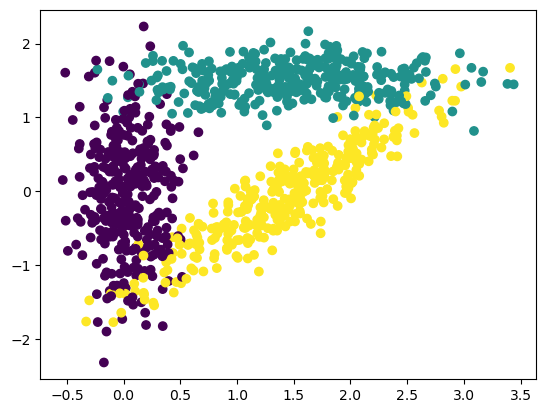

In [4]:
plt.scatter(dataset[:,0],dataset[:,1], c=label*15, cmap='viridis')

In [5]:
def oneHot_encoding(categories ,labels):
    num_samples = len(labels)
    num_categories = len(categories)
    one_hot = np.zeros((num_samples, num_categories))

    # Perform one-hot encoding
    for i, label in enumerate(labels):
        index = categories.index(label)
        one_hot[i, index] = 1
    return one_hot

zij = oneHot_encoding([0,1,2],label)
zij

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [6]:
import math as Math
def classify(dataset,gmm):
    label = []
    for xi in dataset:
        xi = np.array([xi])
        distance = []
        for c in range(gmm[0].shape[0]):
            p_zc = gmm[0][c]
            dist = p_zc * (1/(Math.pi*2*np.linalg.det(gmm[2][c])))*Math.e**((-1/2)*(xi-gmm[1][c]) @ np.linalg.inv(gmm[2][c]) @ (xi-gmm[1][c]).T)
            distance.append(dist)
        max_prob = max(distance)
        label.append(distance.index(max_prob))
    return np.array(label)

### Q2 b

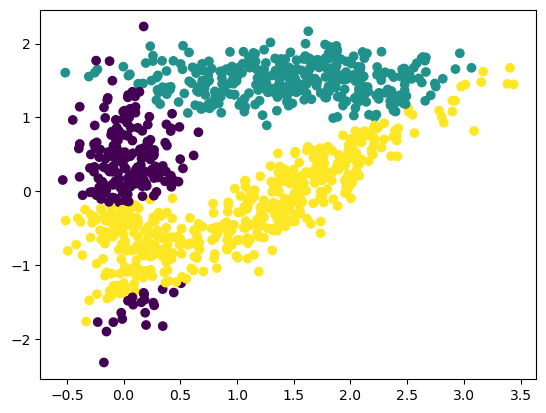

In [7]:
label_fI = classify(dataset,(pi,mean,covariance))
plt.scatter(dataset[:,0],dataset[:,1], c = label_fI*15, cmap='viridis')

### Q3

In [8]:
np.random.seed(20) 
pi_approx = np.array([0.25,0.70,0.05])
mean_approx = np.random.rand(blob_count,blob_dim)
covariance_approx = np.array([[[0.5,0.0],[0.0,0.5]],[[0.9,0],[0.2,0.1]],[[10,4],[4,10]]])

mean

array([[0. , 0. ],
       [1.5, 1.5],
       [1.5, 0. ]])

In [9]:
import math as Math
def calc_gamma(pi,mean,covariance,x):
    gamma = []
    f_c_x = []
    for xi in x:
        f_j_xi = []
        for c in range(pi.shape[0]):
            f_c_xi = Math.e**((-1/2)*((xi - mean[c]).T@np.linalg.inv(covariance[c])@(xi - mean[c])))/ (np.linalg.det(covariance[c])*(2*Math.pi)**(1/2))
            f_c_xi_ = pi[c] * f_c_xi
            f_j_xi.append(f_c_xi_)
        gamma_ij = np.array(f_j_xi)/np.sum(f_j_xi)
        f_c_x.append(f_j_xi)
        gamma.append(gamma_ij)
    return np.array(gamma),np.array(f_c_x)

In [10]:
def Q_0_q(gamma,f_c_x,gmm):
    p = 0
    for i in range(gamma.shape[0]):
        for j in range(gamma.shape[1]):
            p += gamma[i][j] * np.log(gmm[0][j] * f_c_x[i][j])
    return p

In [11]:
def H(gamma):
    return np.sum(-gamma * np.log(gamma))

In [12]:
def calc_para(gamma,x):
    pi_ = np.sum(gamma,axis=0)
    pi = pi_/x.shape[0]

    mean = []
    for c in range(gamma.shape[1]):
        mean_i = 0
        denom = 0
        for i in range(gamma.shape[0]):
            mean_i += gamma[i][c] * x[i]
            denom += gamma[i][c]
        mean.append(mean_i/denom)
    mean = np.array(mean)
    
    covariance = []
    for c in range(gamma.shape[1]):
        covariance_i = 0
        denom = 0
        for i in range(gamma.shape[0]):
            covariance_i += gamma[i][c] * np.array([x[i] - mean[c]]).T@(np.array([x[i] - mean[c]]))
            denom += gamma[i][c]
        covariance.append(covariance_i/denom)
    covariance = np.array(covariance)

    return pi,mean,covariance
    

In [13]:
def group(dataset,centroid):
    label = []
    for sample in dataset:
        distance = []
        for centre in centroid:
            dist = np.sum((sample- centre)**2)
            distance.append(dist)
        min_dist = min(distance)
        label.append(distance.index(min_dist))
    return np.array(label)

In [14]:
def reCentre(dataset,label,k):
    centroid = []
    for i in range(k):
        centre = np.zeros(dataset.shape[1])
        count = 0
        for sample in range(dataset.shape[0]):
            if(label[sample] == i):
                centre+= dataset[sample]
                count += 1
        centre = centre / count
        centroid.append(centre)
    return np.array(centroid)

In [15]:
centroid = []
for i in range(blob_count):
    r = np.random.randint(dataset.shape[0])
    centroid.append(dataset[r])
centroid = np.array(centroid)
centroid

array([[ 1.19834035, -0.62003847],
       [ 1.08804162, -0.24369418],
       [ 1.56912636,  0.17092696]])

In [16]:
tolerance = 1e-5
while(True):
    label_k = group(dataset,centroid)
    centroid_old = centroid.copy()
    centroid = reCentre(dataset,label_k,blob_count)
    if(np.sum((centroid - centroid_old)** 2) < tolerance):
        break
mean_approx = mean_approx

In [17]:
tolerance = 1e-9
likelihood = []
for i in range(100):

    gamma,f_c_x = calc_gamma(pi_approx,mean_approx,covariance_approx,dataset)

    likelihood.append(Q_0_q(gamma,f_c_x,(pi_approx,mean_approx,covariance_approx)) + H(gamma))
    pi_old,mean_old,covariance_old = pi_approx.copy(), mean_approx.copy(), covariance_approx.copy()

    pi_approx,mean_approx,covariance_approx = calc_para(gamma,dataset)

    error = (np.sum((pi_old - pi_approx)**2)+np.sum((mean_old - mean_approx)**2) + np.sum((covariance_old - covariance_approx)**2))**(1/2)
    if(np.sum((pi_old - pi_approx)**2) < tolerance and np.sum((mean_old - mean_approx)**2) < tolerance and np.sum((covariance_old - covariance_approx)**2) < tolerance):
        break

In [18]:
label_approx = classify(dataset,(pi_approx,mean_approx,covariance_approx))
label_approx.shape


(1000,)

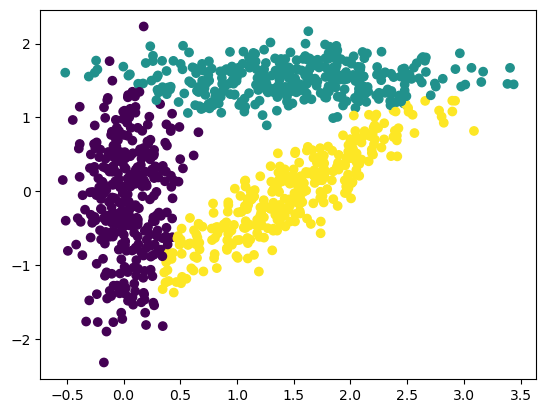

In [19]:
plt.scatter(dataset[:,0],dataset[:,1], c = label_approx*15, cmap='viridis')

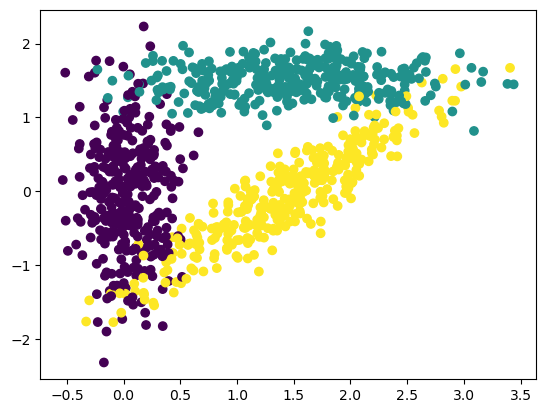

In [20]:
plt.scatter(dataset[:,0],dataset[:,1], c=label*15, cmap='viridis')

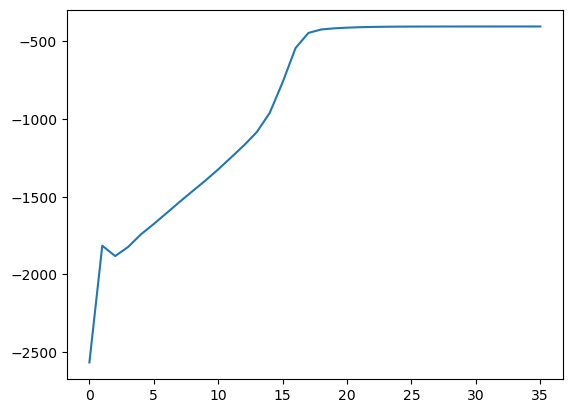

In [21]:
plt.plot(likelihood)